<div style="text-align: right">Authors:</div>
<div style="text-align: right"> Apoorva Mishra - 001438598</div>
<div style="text-align: right"> Srijoni Biswas - 001057367</div>
<div style="text-align: right"> Srinjoy Chakravarty - 001086186</div>



# Analysis On Harry Potter :

Welcome to the world of wizards!!

<br />
<left>
<img src="Contestants.png" width=600 />
</left>

In today's gathering, we present to you the following analysis about Harry Potter!

1. Character Importance of each Character in Harry Potter
2. Gryffindor or Slytherin? Who's better?
3. Quotes/ Dialogues by each Characters from the Manuscripts
4. Sentiment Analysis of each characters based on their Dialogues in Manuscripts
5. Time for Magic!
 

But ...
<br />
<left>
<img src="harry_potter_quotes11.jpg" width=600 />
</left>


    - Said the Algorithms when I ran it first! :D

In [90]:
import pandas as pd
import numpy as np
import PyPDF2
import csv
from pprint import pprint
import re
import pickle
from wordcloud import WordCloud, STOPWORDS 
import json
from ibm_watson import NaturalLanguageUnderstandingV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
from ibm_watson.natural_language_understanding_v1 import Features, EmotionOptions
from nltk import FreqDist
from nltk import PorterStemmer as porter
from nltk import WordNetLemmatizer as WNLemma

In [84]:
char_names = ['Albus','Dumbledore','Albus Dumbledore','McGonagall','Harry','Ron','Hermione'
              ,'Hagrid','Fred','George','Snape','Severus','Professor McGonagall', 'Tom Riddle','Sirius Black'
              ,'Lupin','Professor Lupin']
char_names_upper = [c.upper() for c in char_names] 
char_names_upper.append('PROFESSOR McGONAGALL')
print(char_names_upper)

['ALBUS', 'DUMBLEDORE', 'ALBUS DUMBLEDORE', 'MCGONAGALL', 'HARRY', 'RON', 'HERMIONE', 'HAGRID', 'FRED', 'GEORGE', 'SNAPE', 'SEVERUS', 'PROFESSOR MCGONAGALL', 'TOM RIDDLE', 'SIRIUS BLACK', 'LUPIN', 'PROFESSOR LUPIN', 'PROFESSOR McGONAGALL']


In [30]:
def safe_insert(dictionary, key, value):
    if key in dictionary:
        dictionary[key].append(value)
    else:
        dictionary[key] = list()
        dictionary[key].append(value)

def line_counts(dictionary):
    for key in dictionary:
        print(key, len(dictionary[key]))

In [31]:
hp1_character_lines = {}

with open('harryPotter.txt','r') as hp1:
    for line in hp1:
        if line.strip() and ':' in line:
            character = line.split(':')[0]
            dialogue = line.split(':')[1]
            cleaned_dialogue = re.sub(r'\{.*?\}', '', dialogue)
            
            if character in char_names and cleaned_dialogue.strip():
                safe_insert(hp1_character_lines, character, cleaned_dialogue.strip())

line_counts(hp1_character_lines)

Dumbledore 27
McGonagall 30
Hagrid 85
Harry 225
George 3
Fred 4
Ron 123
Hermione 89
Snape 10


In [32]:
hp1_character_lines =  {k.upper(): v for k, v in hp1_character_lines.items()}

In [33]:
line_counts(hp1_character_lines)

DUMBLEDORE 27
MCGONAGALL 30
HAGRID 85
HARRY 225
GEORGE 3
FRED 4
RON 123
HERMIONE 89
SNAPE 10


In [34]:
hp2_character_lines = {}
current_character = None
cur_line = ''

with open('harryPotter.txt','r') as hp2:
    for row in hp2:
        
        # Branch 1 ('HARRY', 'RON', 'FILCH', etc)
        if row.strip() == row.strip().upper() and row.strip() != '':  # new character is speaking
            if current_character:  # we care about this character
                safe_insert(hp2_character_lines, current_character, cur_line.strip())
            current_character = None
            cur_line = ''
            
        # Branch 2 ('HARRY', 'RON', etc)
        if row.strip() in char_names_upper:
            current_character = row.strip()
            
        # Branch 3 -- any dialogue
        elif row.strip() != row.strip().upper():
            cur_line += ' ' + row.strip()

            
line_counts(hp2_character_lines)


HARRY 1166
RON 592
FRED 57
GEORGE 47
HAGRID 121
HERMIONE 614
SNAPE 93
DUMBLEDORE 285
PROFESSOR MCGONAGALL 61
TOM RIDDLE 70
PROFESSOR LUPIN 86
SIRIUS BLACK 36
MCGONAGALL 21
LUPIN 18


In [35]:
pprint(hp2_character_lines)

{'DUMBLEDORE': ['They are not.',
                "I'm well aware of our bylaws, Severus, having written more "
                'than a few myself.  However, as Head of Gryffindor House, it '
                'is for Professor McGonagall to determine the appropriate '
                'action.',
                "Splendid.  Now, I suggest we return to the feast.  There's a "
                'delicious-looking custard tart I want to sample.',
                'Argus!',
                'Everyone will proceed to their dormitories immediately. '
                'Everyone except you three.',
                "She's not dead, Argus.  She's been Petrified.",
                "But how she's been Petrified... I cannot say.",
                'Innocent until proven guilty.',
                'We will be able to cure her, Argus.  As I understand it, '
                'Madam Sprout has a very healthy growth of Mandrakes.  When '
                'they have matured, a potion will be made which will revive '


           'Cedric! Cedric lays dead on the ground. Wormtail pulls Harry '
           'closer, a status grabs hold of Harry and traps him.',
           "Don't touch him. Harry struggles to get free.",
           'Have it your way. They both cast and their streams of magic meet. '
           'They both struggle.',
           "He's back, he's back! Voldemort's back. Cedric, he asked me to "
           "bring his body back. I couldn't leave him, not there.",
           'Not so much now.',
           'The cup was a portkey. Someone had bewitched it.',
           'Who?',
           "I dunno. It was like I'd fallen into one of my dreams. One of my "
           'nightmares. Mad-Eye starts shaking and struggling for air, he '
           "reaches for his bottle but it's empty. He rushes to a chest with "
           'other bottles and struggles to find one.',
           "Um. I don't think I said anything about a graveyard Professor.",
           'It was you from the beginning. You put my name in

              'Wendell and Monica Wilkens now reside happily in Sydney, '
              'Australia.  They have two dogs, run a small sweet shop, but '
              'floss daily.  No children.',
              'Maybe we should just stay here, Harry.  Grow old.',
              'You wanted to know who the boy in the photograph was.  Well, I '
              'know.',
              'It was in Bathilda’s sitting room. Rita Skeeter had sent it to '
              'her. Harry, it doesn’t make for very nice reading --',
              'Yes.',
              'For a time.',
              'Gellert Grindelwald.  He’s not very well known in Britain, but '
              'there was a time, before You-Know- Who...',
              'When Grindelwald was seventeen, he was expelled from '
              'Durmstrang. He’d started doing some twisted things at school -- '
              'experiments. A few teachers had always protected him, but they '
              'couldn’t anymore.  After he left, he traveled for

                'Sir?  If it all stopped.  If the person responsible was '
                'caught...',
                'No, sir.  Nothing.',
                'Evening, Hagrid.',
                "I'm going to have to turn you in, Hagrid.  I don't think you "
                'meant it to kill anyone --',
                "Hagrid.  The dead girl's parents will be here tomorrow.  The "
                'least Hogwarts can do is make sure the thing that killed '
                'their daughter is slaughtered.',
                "She won't wake.",
                "She's still alive.  But only just.",
                'A memory.  Preserved in a diary for fifty years.',
                "It won't come until it's called.",
                "You won't be needing it.",
                "I'm afraid I can't do that, Harry. You see, as poor Ginny "
                'grows weaker... I grow stronger.',
                "Yes.  I'm afraid so.  But then, she's been in so much pain, "
                "poor Ginny. 

In [36]:
def safe_combine(dictionary, key, value):
    if key not in dictionary:
        dictionary[key] = []
    dictionary[key].extend(value)

In [37]:
dialogues_dict = {}

for key, value in hp1_character_lines.items():
    safe_combine(dialogues_dict, key, value)
    
for key, value in hp2_character_lines.items():
    safe_combine(dialogues_dict, key, value)

In [86]:
line_counts(dialogues_dict)

DUMBLEDORE 312
MCGONAGALL 51
HAGRID 206
HARRY 1391
GEORGE 50
FRED 61
RON 715
HERMIONE 703
SNAPE 103
PROFESSOR MCGONAGALL 61
TOM RIDDLE 70
PROFESSOR LUPIN 86
SIRIUS BLACK 36
LUPIN 18


In [39]:
dialogues_dict['TOM RIDDLE']

['Professor Dumbledore.',
 'Yes, Professor.  I suppose I -- I just had to see for myself, if...',
 '... the rumors were true.',
 "About the school as well?  They wouldn't really close Hogwarts, would they, Professor?",
 'Sir?  If it all stopped.  If the person responsible was caught...',
 'No, sir.  Nothing.',
 'Evening, Hagrid.',
 "I'm going to have to turn you in, Hagrid.  I don't think you meant it to kill anyone --",
 "Hagrid.  The dead girl's parents will be here tomorrow.  The least Hogwarts can do is make sure the thing that killed their daughter is slaughtered.",
 "She won't wake.",
 "She's still alive.  But only just.",
 'A memory.  Preserved in a diary for fifty years.',
 "It won't come until it's called.",
 "You won't be needing it.",
 "I'm afraid I can't do that, Harry. You see, as poor Ginny grows weaker... I grow stronger.",
 "Yes.  I'm afraid so.  But then, she's been in so much pain, poor Ginny.  She's been writing to me for months, telling me all her pitiful worries an

In [40]:
list1 = []
happy = "You're a wizard, Harry"
for key, values in dialogues_dict.items():
    list1 = values;
    for x in list1:
        if (happy in x):
            print(key)


HAGRID


<br />
<left>
<img src="harry-wizard.gif" width=600 />
</left>

## Let us now see how each of the Characters felt, through their dialogues

Here, we run a Sentiment Analysis using the IBM-Watson API call. We ideally call the API because it gives a wider spectrum of emotions to gauge from rather than `polarity`

In [44]:
import nltk
import ssl 
"""SSL is used for creating a secured seesion for authentication"""
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context



In [45]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.tokenize import sent_tokenize 

    
stop_words = set(stopwords.words('english')) 

def clean_data(val):
    """This function returns clean data. This function will take data from open file pointers and drop new line and tab characters.
    Convert all the characters to lowercase to minimize the vocabulary and removes all the english stop words"""
    #remove new line and tab characters
    val = val.strip('\\n') 
    val = val.strip('\\t')
    # replacing new line and tab characters with white spaces 
    val = val.replace('\\n','')
    val = val.replace('\\t','')
    word_tokens = word_tokenize(str(val).lower().strip('[]') )
    #filtering sentences with stop words
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 

    filtered_sentence = [] 

    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 

    return list(filtered_sentence)


In [104]:
Char_senti = {}

for key, values in dialogues_dict.items():
    v = list(set(clean_data(str(dialogues_dict[key]).strip('[]'))))
    Char_senti[key] = v


In [105]:
## Let's check for DUMBLEDORE 
Char_senti['DUMBLEDORE']

['close',
 'dementors',
 'name',
 'forgiving',
 "'over",
 'occasion',
 "'nooooooo",
 'mark',
 'crouch',
 'winner',
 'tears',
 'store',
 'mine',
 'head',
 'sparks',
 'paralyze',
 'notices',
 'stone',
 'fifty',
 'able',
 "'being",
 'assume',
 'death',
 '60',
 'contestants',
 'comical',
 'act',
 'died',
 'kiwi',
 'make',
 'also',
 'birth',
 'speaking',
 "'careful",
 'judges',
 'petrified',
 'willing',
 'mad-eye',
 'staffs',
 'stumbles',
 'flavour',
 'mistaken',
 'hear',
 'sins',
 'healing',
 'man',
 'right',
 "'too",
 'phoenix',
 "'now",
 'forest',
 'maxime',
 'falls',
 'way',
 "'he",
 'light',
 'away',
 'seem',
 'know',
 'expect',
 'apparate',
 'weasly',
 'simply',
 'detail',
 'exceptionally',
 'services',
 'doubt',
 'back',
 "'ll",
 'note',
 'lady',
 'rules',
 'retracing',
 'gives',
 "'re",
 'welcome',
 "'excellent",
 'throat',
 ':',
 'saw',
 'cancelled',
 'rest',
 'extraordinarily',
 'request',
 'sorry',
 'accident',
 'return',
 'clear',
 'casts',
 'beyond',
 'licorice',
 'north',
 'be

In [78]:
# Frequency Distribution
FD = {}
for key, values in Char_senti.items():
    v = FreqDist(Char_senti[key])
    FD[key] = v

FD

{'DUMBLEDORE': FreqDist({'close': 1, 'dementors': 1, 'name': 1, 'forgiving': 1, "'over": 1, 'occasion': 1, "'nooooooo": 1, 'mark': 1, 'crouch': 1, 'winner': 1, ...}),
 'MCGONAGALL': FreqDist({'name': 1, 'full': 1, "'do": 1, 'seated': 1, 'rumours': 1, 'miss': 1, 'mark': 1, 'follow': 1, 'momentarily': 1, 'moody': 1, ...}),
 'HAGRID': FreqDist({'brooms': 1, 'close': 1, 'name': 1, 'um': 1, 'bits': 1, 'seriously': 1, 'seen': 1, 'yeh': 1, 'occasion': 1, "'beaky": 1, ...}),
 'HARRY': FreqDist({'close': 1, 'george': 1, 'dementors': 1, 'name': 1, 'gateway': 1, 'paying': 1, 'writing': 1, 'mark': 1, 'warm': 1, 'crouch': 1, ...}),
 'GEORGE': FreqDist({'becomes': 1, 'dead': 1, 'day': 1, 'appears': 1, 'name': 1, 'clipping': 1, "'ah": 1, 'wormtail': 1, 'large': 1, 'got': 1, ...}),
 'FRED': FreqDist({"'every": 1, "'pacing": 1, 'george': 1, 'brooms': 1, 'day': 1, 'appears': 1, "'wicked": 1, 'full': 1, 'anyone': 1, 'uncomfortable': 1, ...}),
 'RON': FreqDist({'close': 1, 'george': 1, 'floated': 1, 'name

In [106]:
Char_string={}
for key, values in Char_senti.items():
    var=""
    for w in Char_senti[key]:
        var = var+' '+w
    Char_string[key] = var



In [111]:
Char_string['TOM RIDDLE']

" close name process last look writing trance matter ’ challenged `` fifty able killed come knees preserved seven . woes greatest power minutes daughter make professors happen turn reading dumbledore number wake pouring split obeys grows restricted stop threatening match self basilisk hear parents dispose fully instance suppose caught preserving sir capture unwisely imagine people years know trust dark hurt strangling weasley extraordinary noble 'who 'prove rumors 'professor 'yes back 'll 're mere scare 'murder rest things without 'speak school return feeding heir target sends dear penetrates 'no training -- damage really best professor nothing girl 'sir called fool move telling illuminate magic pain want mad new talk tried 'what soul bit misunderstand fears fear kind soon sixteen-year-old months 'kill across finish secret 'd 's would hogwarts cole persuasive scar bad slytherin work disappointment 'evening ' meet famous hands feel show live nearly lead ? final staff rather talent darke

In [119]:
bad_chars = [';', ':', '!', "*", '`','-', '.', '', "'"] 

for key, values in Char_string.items():
    for i in bad_chars : 
        Char_string[key] = Char_string[key].replace(i, '') 

In [120]:
Char_string['TOM RIDDLE']

' close name process last look writing trance matter ’ challenged  fifty able killed come knees preserved seven  woes greatest power minutes daughter make professors happen turn reading dumbledore number wake pouring split obeys grows restricted stop threatening match self basilisk hear parents dispose fully instance suppose caught preserving sir capture unwisely imagine people years know trust dark hurt strangling weasley extraordinary noble who prove rumors professor yes back ll re mere scare murder rest things without speak school return feeding heir target sends dear penetrates no training  damage really best professor nothing girl sir called fool move telling illuminate magic pain want mad new talk tried what soul bit misunderstand fears fear kind soon sixteenyearold months kill across finish secret d s would hogwarts cole persuasive scar bad slytherin work disappointment evening  meet famous hands feel show live nearly lead ? final staff rather talent darkest curiosity book power

In [125]:
dicti={}

authenticator = IAMAuthenticator('7iWlOedWeTpgREu12do8yDjjxHC3WiNrc593r4sAjrdC')
natural_language_understanding = NaturalLanguageUnderstandingV1(
   authenticator=authenticator,
    version='2019-07-25')
natural_language_understanding.set_service_url('https://gateway.watsonplatform.net/natural-language-understanding/api') 

for key, values in Char_string.items():
    response = natural_language_understanding.analyze(
    text=Char_string[key],
    features=Features(emotion=EmotionOptions())).get_result()
    print(key)
    print("======================================")
    dicti[key]=response["emotion"]["document"]["emotion"]
    print(json.dumps(response["emotion"]["document"]["emotion"], indent=2))
    


DUMBLEDORE
{
  "sadness": 0.393443,
  "joy": 0.244756,
  "fear": 0.488767,
  "disgust": 0.002128,
  "anger": 0.069359
}
MCGONAGALL
{
  "sadness": 0.201357,
  "joy": 0.586581,
  "fear": 0.135336,
  "disgust": 0.054512,
  "anger": 0.144055
}
HAGRID
{
  "sadness": 0.495698,
  "joy": 0.0252,
  "fear": 0.492819,
  "disgust": 0.063912,
  "anger": 0.282537
}
HARRY
{
  "sadness": 0.478545,
  "joy": 0.007809,
  "fear": 0.521512,
  "disgust": 0.058058,
  "anger": 0.304941
}
GEORGE
{
  "sadness": 0.588375,
  "joy": 0.094385,
  "fear": 0.294806,
  "disgust": 0.123561,
  "anger": 0.223059
}
FRED
{
  "sadness": 0.216721,
  "joy": 0.557094,
  "fear": 0.053978,
  "disgust": 0.218816,
  "anger": 0.092543
}
RON
{
  "sadness": 0.482142,
  "joy": 0.010006,
  "fear": 0.548931,
  "disgust": 0.088022,
  "anger": 0.238915
}
HERMIONE
{
  "sadness": 0.474669,
  "joy": 0.018498,
  "fear": 0.630158,
  "disgust": 0.021034,
  "anger": 0.155867
}
SNAPE
{
  "sadness": 0.301738,
  "joy": 0.427338,
  "fear": 0.301266,


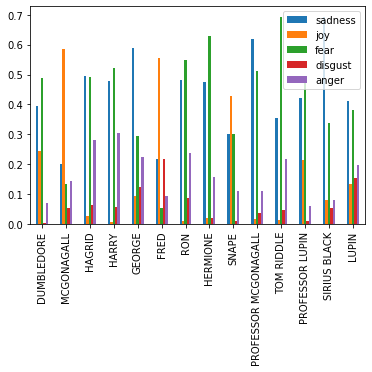

In [126]:
df = pd.DataFrame(dicti)

df.transpose().plot(kind='bar')

In [127]:
df.head()

,DUMBLEDORE,MCGONAGALL,HAGRID,HARRY,GEORGE,FRED,RON,HERMIONE,SNAPE,PROFESSOR MCGONAGALL,TOM RIDDLE,PROFESSOR LUPIN,SIRIUS BLACK,LUPIN
sadness,0.393443,0.201357,0.495698,0.478545,0.588375,0.216721,0.482142,0.474669,0.301738,0.619151,0.354258,0.422550,0.693453,0.413297
joy,0.244756,0.586581,0.025200,0.007809,0.094385,0.557094,0.010006,0.018498,0.427338,0.015658,0.011696,0.214209,0.080663,0.132108
fear,0.488767,0.135336,0.492819,0.521512,0.294806,0.053978,0.548931,0.630158,0.301266,0.512085,0.691433,0.493434,0.339463,0.381765
disgust,0.002128,0.054512,0.063912,0.058058,0.123561,0.218816,0.088022,0.021034,0.011106,0.037917,0.046446,0.011221,0.052797,0.153505
anger,0.069359,0.144055,0.282537,0.304941,0.223059,0.092543,0.238915,0.155867,0.111678,0.108816,0.218908,0.060938,0.078894,0.198015


In [156]:
##Summmation of Emotions to understand the complete of harry potter

df_t = df.transpose()
sadness = df_t['sadness'].sum()
joy = df_t['joy'].sum()
fear = df_t['fear'].sum()
disgust = df_t['disgust'].sum()
anger = df_t['anger'].sum()
height =[sadness, joy, fear, disgust, anger]
bars =['sadness', 'joy', 'fear', 'disgust', 'anger']

y_pos = np.arange(len(bars))


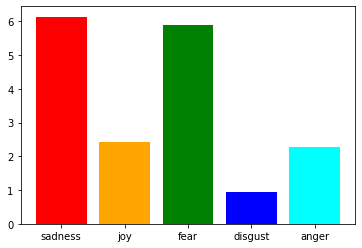

In [162]:
plt.bar(y_pos, height, color=['red', 'orange', 'green', 'blue', 'cyan'])
plt.xticks(y_pos, bars)
plt.show()


From this we find he more prominen emotion that we obtain from the manuscript is: **Sadness** 

We offcourse we agree, Albus Dumbeldore died !!!! And Snape tooo! And not to forget Dobby too!

<br />
<left>
<img src="Dumbledore-Died.gif" width=600 />
</left>

